In [103]:
# import libraries
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os

In [104]:
base_dir = 'images/original_notes_images/'
training_dir = 'images/training_notes/'
file_paths = []
label_map = {
    'C4': 0, 'D4': 1, 'E4': 2, 'F4': 3, 'G4': 4, 'A4': 5, 'B4': 6, 'C5': 7, 
    'D5': 8, 'E5': 9, 'F5': 10, 'G5': 11, 'A5': 12, 'B5': 13,'C6': 14
}

new_label_map = {
    'C4': 0, 'G4': 1, 'A5': 2
}

test_img = cv2.imread("images/training_notes/C4_1.png")
h, w, _ = test_img.shape

In [3]:
# read in files
for filename in os.listdir(training_dir):
    if filename.endswith('.png'):
        file_paths.append(os.path.join(training_dir, filename))

X = []
y = []

# import files 
for filename in file_paths:
    # open file 
    img = cv2.imread(filename, 0)

    # convert to array
    img = np.array(img)

    # normalize
    img = img/255.0

    # add to training data
    X.append(img)
    
    # get note name
    parts = filename.split('/')
    label = parts[2].split('_')[0]

    # assign y label
    y.append(label_map[label])

X = np.array(X).reshape(-1, h ,w, 1)
y = np.array(y)

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


# Split first — stratify ensures all classes are represented
X_train, X_val, y_train_raw, y_val_raw = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Then one-hot encode each set
num_classes = len(label_map)  
# num_classes = 3
y_train = to_categorical(y_train_raw, num_classes=num_classes)
y_val = to_categorical(y_val_raw, num_classes=num_classes)


model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(h, w, 1)),
    MaxPooling2D(),
    Conv2D(16, (3, 3), activation='relu', input_shape=(h, w, 1)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.1, 
    height_shift_range=0.1,
    zoom_range=0.05
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(X_train, y_train, batch_size=16), epochs=20, validation_data = (X_val, y_val))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


169/169 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.1311 - loss: 2.5382 - val_accuracy: 0.5778 - val_loss: 1.3243
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - accuracy: 0.4056 - loss: 1.6685 - val_accuracy: 0.6356 - val_loss: 1.1361
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.4224 - loss: 1.5147 - val_accuracy: 0.6504 - val_loss: 0.9737
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.4582 - loss: 1.4303 - val_accuracy: 0.6326 - val_loss: 0.9474
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 17s 102ms/step - accuracy: 0.4809 - loss: 1.3452 - val_accuracy: 0.7156 - val_loss: 0.8235
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.5237 - loss: 1.2419 - val_accuracy: 0.7363 - val_loss: 0.7743
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 49s 292ms/step - accuracy: 0.5574 - loss: 1.1597 - val_accuracy: 0.7763 - val_loss: 0.6992
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 47s 279ms/step - accuracy: 0.6173 - loss: 1.0405 - val

In [ ]:
model.save('classifier_model.keras') 

['classifier_model.pkl']

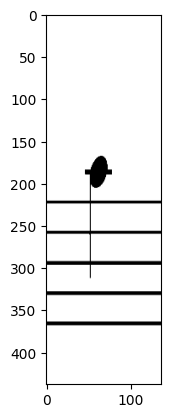

In [5]:
test_img = cv2.imread(f"{training_dir}A5_16.png", 0)
test_img = cv2.resize(test_img, (w, h))
test_img = test_img / 255.0
test_img = test_img.reshape(1, h, w, 1)
plt.imshow(test_img.reshape(h, w), cmap='gray')


['images/original_notes_images/A5.png', 'images/original_notes_images/A4.png', 'images/original_notes_images/F4.png', 'images/original_notes_images/F5.png', 'images/original_notes_images/G5.png', 'images/original_notes_images/G4.png', 'images/original_notes_images/D5.png', 'images/original_notes_images/D4.png', 'images/original_notes_images/E4.png', 'images/original_notes_images/E5.png', 'images/original_notes_images/B5.png', 'images/original_notes_images/B4.png', 'images/original_notes_images/C6.png', 'images/original_notes_images/C4.png', 'images/original_notes_images/C5.png']
15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32

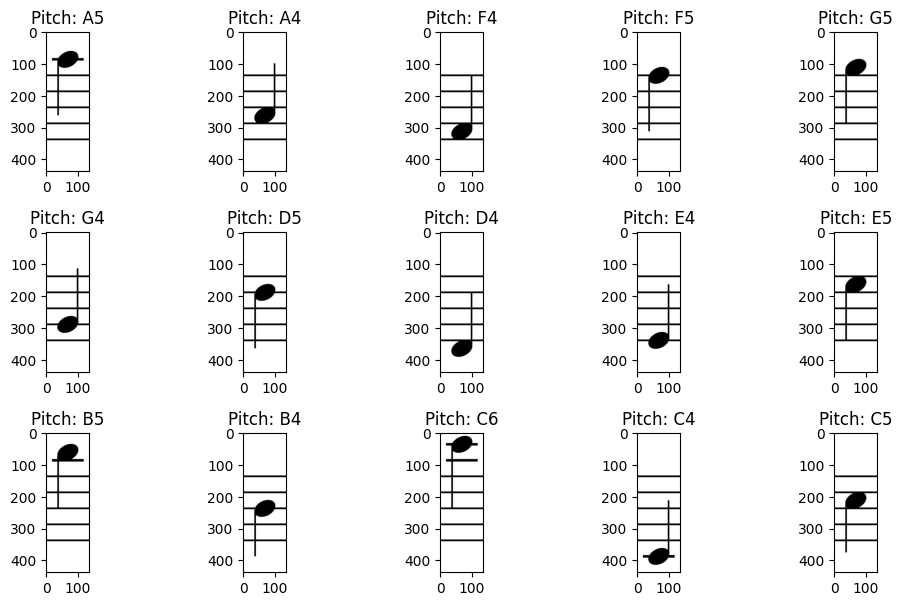

In [6]:
# read in files
file_paths = []
pred = []
for filename in os.listdir('images/original_notes_images/'):
    if filename.endswith('.png'):
        file_paths.append(os.path.join(base_dir, filename))

print(file_paths)

print(len(file_paths))
n = len(file_paths)
cols = 5
rows = (n+cols-1)

plt.figure(figsize=(cols*2, rows*2))
for i, img in enumerate(file_paths):
    img = cv2.imread(img, 0)
    img = cv2.resize(img, (w, h))
    img = img / 255.0
    img = img.reshape(1, h, w, 1)
    pred = model.predict(img)
    pitch = list(label_map.keys())[np.argmax(pred)]

    # plot
    plt.subplot(rows, cols, i+1)
    plt.imshow(img.reshape(h, w), cmap='gray')
    plt.axis('on')
    plt.title(f"Pitch: {pitch}")
plt.tight_layout()
plt.show()

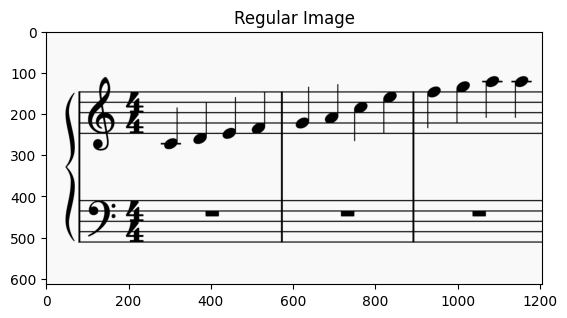

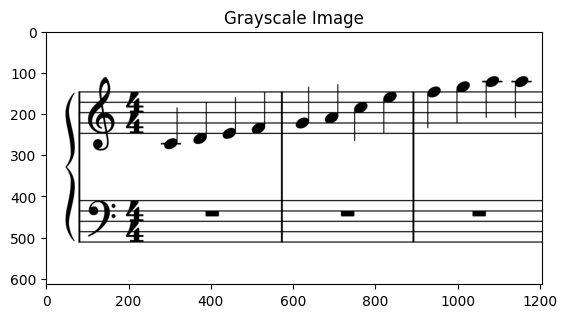

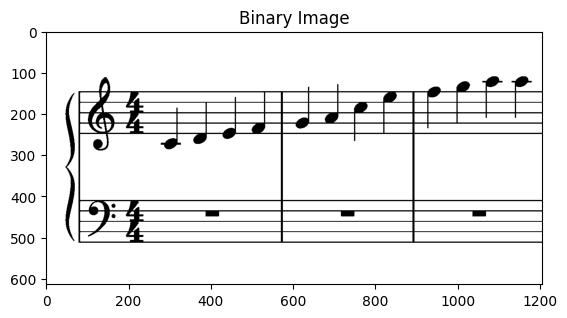

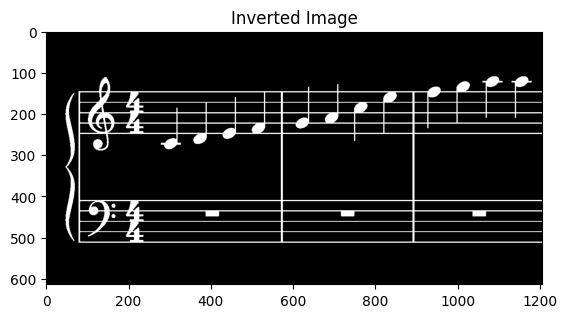

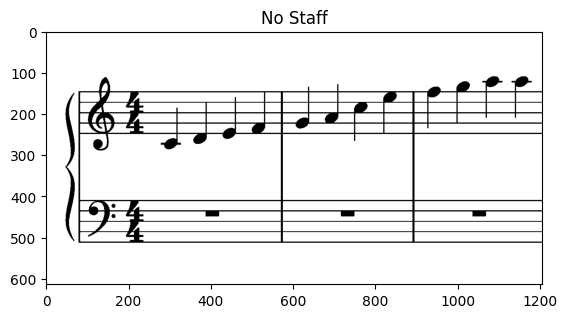

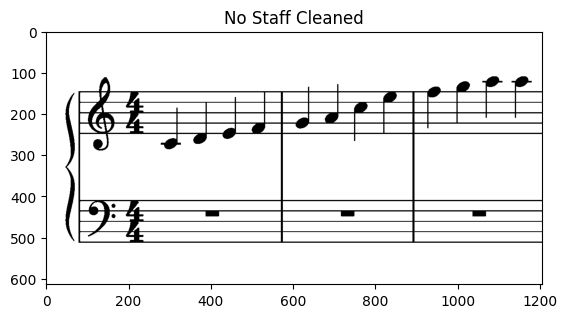

In [7]:
# read image
img = np.array(Image.open("images/sheet_music/scale2.png"))
plt.imshow(img)
plt.title("Regular Image")
plt.show()

# convert to grayscale 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.show()

# convert to binary
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.show()

# invert the image: background = black, foreground = white
invert = cv2.bitwise_not(binary)
plt.imshow(invert, cmap='gray')
plt.title("Inverted Image")
plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))
staff_lines = cv2.morphologyEx(invert, cv2.MORPH_OPEN, kernel)
no_staff=cv2.subtract(binary, staff_lines)
plt.imshow(no_staff, cmap='gray')
plt.title("No Staff")
plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
cleaned = cv2.morphologyEx(no_staff, cv2.MORPH_CLOSE, kernel)
plt.imshow(no_staff, cmap='gray')
plt.title("No Staff Cleaned")
plt.show()

In [8]:


test_img = cv2.imread("images/training_notes/C4_1.png")
h, w, _ = test_img.shape
print(test_img.shape)

(438, 136, 3)


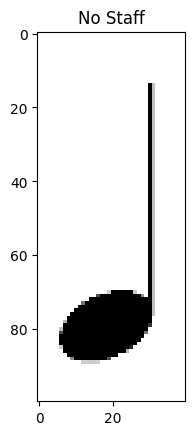

In [30]:
template = cv2.imread('images/quarter_note_template2.png', 0)
_, template = cv2.threshold(template, 127, 255, cv2.THRESH_BINARY)
# template = cv2.bitwise_not(template)
# Fill gaps inside the notehead using morphological closing
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
# filled = cv2.morphologyEx(template, cv2.MORPH_CLOSE, kernel)
template = cv2.resize(template, (40, 100))

# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 1))
# staff_lines = cv2.morphologyEx(template, cv2.MORPH_OPEN, kernel)
# no_staff=cv2.subtract(template, staff_lines)
plt.imshow(template, cmap='gray')
plt.title("No Staff")
plt.show()


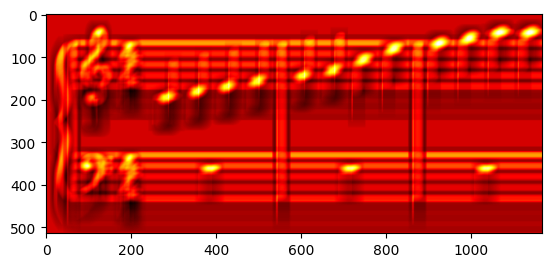

In [31]:
result = cv2.matchTemplate(binary, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.4 # adjust for sensitivity
locations = np.where(result >= threshold)
plt.imshow(result, cmap='hot')
plt.show()

In [32]:
def filter_duplicate_points(points, min_distance=1):
    filtered = []
    for pt in points:
        too_close = False
        for kept in filtered:
            if np.linalg.norm(np.array(pt) - np.array(kept)) < min_distance:
                too_close = True
                break
        if not too_close:
            filtered.append(pt)
    return filtered

In [33]:
raw_pts = list(zip(*locations[::-1]))  # x, y points
filtered_pts = filter_duplicate_points(raw_pts, min_distance=40)
print(len(filtered_pts))
print(filtered_pts[0])

19
(1067, 35)


In [50]:
w, h = template.shape[::-1]
print(w, h)
source_img = gray
candidates = []
for pt in filtered_pts:
    x, y = pt
    crop = source_img[y:y+h, x:x+w]
    candidates.append((x, y, crop))
print(len(candidates))

40 100
19


In [48]:
file_paths = []
for filename in os.listdir("images/testing/"):
    if filename.endswith('.png'):
        file_paths.append(os.path.join("images/testing/", filename))

# Select 25 unique random file paths
selected_files = random.sample(file_paths, 25)
print(selected_files)


['images/testing/D4_1.png', 'images/testing/A4_2.png', 'images/testing/A5_6.png', 'images/testing/B5_7.png', 'images/testing/C5_8.png', 'images/testing/B5_1.png', 'images/testing/C4_1.png', 'images/testing/G5_7.png', 'images/testing/B4_8.png', 'images/testing/A5_0.png', 'images/testing/E5_2.png', 'images/testing/G4_0.png', 'images/testing/E4_0.png', 'images/testing/E4_5.png', 'images/testing/F5_0.png', 'images/testing/C4_0.png', 'images/testing/E5_1.png', 'images/testing/A4_5.png', 'images/testing/E4_4.png', 'images/testing/D4_5.png', 'images/testing/G4_1.png', 'images/testing/E5_8.png', 'images/testing/B5_4.png', 'images/testing/E5_6.png', 'images/testing/C4_7.png']


5 29
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


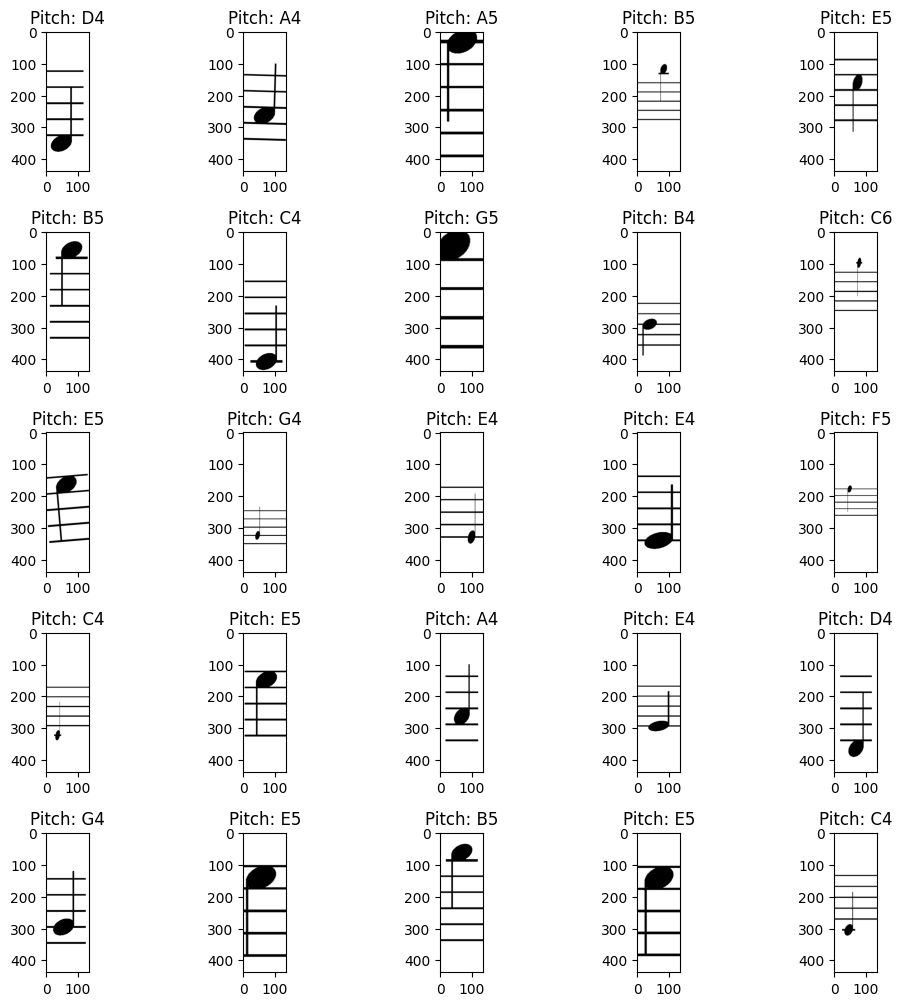

In [49]:
test_img = cv2.imread("images/training_notes/C4_1.png")
h, w, _ = test_img.shape

n = len(selected_files)
cols = 5
rows = (n+cols-1)

print(cols, rows)

plt.figure(figsize=(cols*2, rows*2))
for i, img in enumerate(selected_files):
    img = cv2.imread(img, 0)
    img = cv2.resize(img, (w, h))
    img = img / 255.0
    img = img.reshape(1, h, w, 1)
    pred = model.predict(img)
    pitch = list(label_map.keys())[np.argmax(pred)]

    # plot
    plt.subplot(rows, cols, i+1)
    plt.imshow(img.reshape(h, w), cmap='gray')
    plt.axis('on')
    plt.title(f"Pitch: {pitch}")
plt.tight_layout()
plt.show()

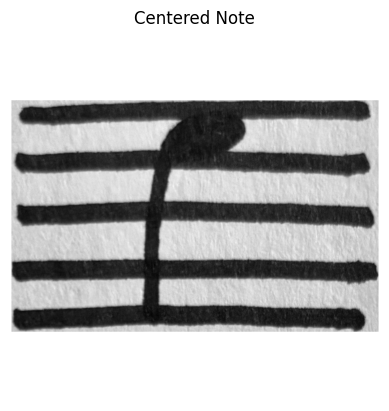

In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image (grayscale is fine)
img = cv2.imread("images/test_hw3.png", 0)

# Apply binary threshold (Otsu)
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find the largest contour — assume it's the note
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    # Get the bounding box of the largest contour
    largest = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest)

    # Crop around the note
    cropped = img[y:y+h, x:x+w]

    # Optional: center in square white canvas
    size = max(w, h) + 10  # add padding
    centered = np.ones((size, size), dtype=np.uint8) * 255  # white canvas

    # Compute offsets to center
    y_offset = (size - h) // 2
    x_offset = (size - w) // 2
    centered[y_offset:y_offset+h, x_offset:x_offset+w] = cropped

    # Show the result
    plt.imshow(centered, cmap='gray')
    plt.axis('off')
    plt.title("Centered Note")
    plt.show()
else:
    print("No note detected.")


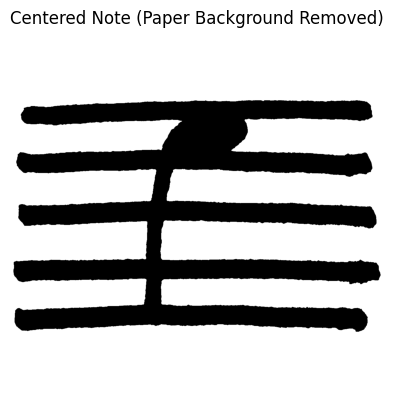

In [99]:
_, binary = cv2.threshold(centered, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
img = cv2.bitwise_not(binary)
plt.imshow(img, cmap='gray')
plt.title("Centered Note (Paper Background Removed)")
plt.axis('off')
plt.show()

(438, 136, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


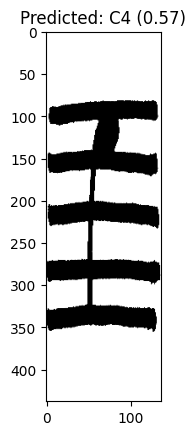

In [101]:
test_img = cv2.imread("images/original_notes_images/A4.png")
target_h, target_w, _ = test_img.shape
print(test_img.shape)

# Step 4: Resize, normalize, and reshape for model
resized = cv2.resize(img, (target_w, target_h))
normalized = resized / 255.0
reshaped = normalized.reshape(1, target_w, target_h, 1)

# Step 5: Load model and predict
prediction = model.predict(reshaped)
pred = np.argmax(prediction)
pitch = list(label_map.keys())[np.argmax(pred)]
confidence = prediction[0][pred]

# Step 6: Display result
plt.imshow(resized, cmap='gray')
plt.title(f"Predicted: {pitch} ({confidence:.2f})")
plt.axis('on')
plt.show()

(438, 136, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


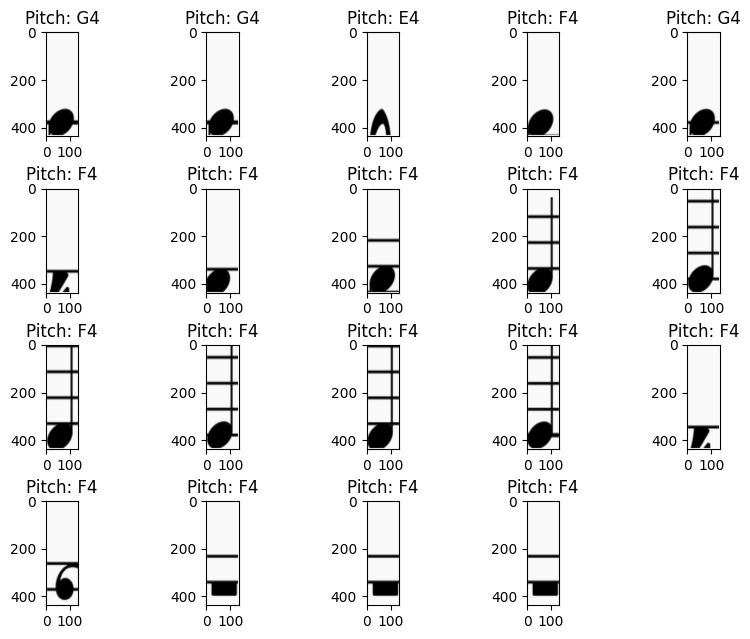

In [53]:
processed_X = []
positions = []

test_img = cv2.imread("images/original_notes_images/A4.png")
target_h, target_w, _ = test_img.shape
print(test_img.shape)

# plot
n = len(candidates)
cols = 5
rows = (n+cols-1)
i = 0

plt.figure(figsize=(cols*2, rows*2))
plt.subplots_adjust(hspace=0.5)  # Increase vertical spacing


for x, y, crop in candidates:
    # Resize crop to fit inside target size with margin (subtract padding)
    resized = cv2.resize(crop, (target_w - 8, target_h - 8))

    # Create blank white canvas
    padded = np.ones((target_h, target_w), dtype=np.uint8) * 255

    # Compute top-left offsets to center the resized crop
    y_offset = (target_h - resized.shape[0]) // 2
    x_offset = (target_w - resized.shape[1]) // 2

    # Paste resized crop into center of white background
    padded[y_offset:y_offset+resized.shape[0], x_offset:x_offset+resized.shape[1]] = resized

    # Normalize and reshape
    normalized = padded / 255.0
    reshaped = normalized.reshape(1, target_h, target_w, 1)

    processed_X.append(reshaped)
 
    pred = model.predict(reshaped)
    pitch = list(label_map.keys())[np.argmax(pred)]
    
    plt.subplot(rows, cols, i+1)
    plt.imshow(reshaped.reshape(target_h, target_w), cmap='gray')
    plt.title(f"Pitch: {pitch}")
    plt.axis('on')
    i = i + 1
